In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities_v3 import *
from shutil import copyfile

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
def repeat(arr, count):
    z_sig = []
    for i in range(count):
        z_sig.extend(arr)
    return z_sig

def mock_injection_signal_from_noise(alpha_scale,lambda_val,height_sep=-15.5,x_sep=13.9,offset_y=+4.9,phase_shift="TF"):
    stroke=-202
    frequency=3
    axis="z"
    yuk_or_grav="yuk"
    alpha=1
    bead_size=7.6
    signal_sim = force_vs_time(x_sep,height_sep,stroke,frequency,axis,lambda_val,offset_y,yuk_or_grav,alpha,bead_size)
    
    # shift phase of signal according to TF
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]

    # convert to bits, this works only for one second chunk!
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]

    TF_phases = [1.22,0.97,0.65,0.49,0.3,0.12,0.29,0.13,0.23,0.22,0.27,0.27,0.07]    
    if(phase_shift=="TF"):TF_phase_shift = TF_phases
    elif(phase_shift=="Flip"):TF_phase_shift = [-1*element for element in TF_phases] # this flips
    elif(phase_shift=="Random_TF"):TF_phase_shift = [1*np.random.normal(element,element/20) for element in TF_phases]
    elif(phase_shift=="Random"):TF_phase_shift =  np.random.uniform(-np.pi,np.pi,len(TF_phases))
    else:TF_phase_shift = len(TF_phases)*[0]
    print(TF_phase_shift)
    harmonics = np.arange(3,len(TF_phases)*3+3,3)

    #print(len(TF_phase_shift))
    # 6 charges new
    amplitude_scale = [2.40E-17,1.35E-17,1.05E-17,9.78E-18,9.45E-18,9.81E-18,9.82E-18,1.04E-17,9.92E-18,7.50E-18,8.37E-18,7.10E-18,7.84E-18]

    fft_sim = np.fft.rfft(signal_sim[1]) 
    new_fft_sim = fft_sim.copy()
    new_fft_shift_only = fft_sim.copy()
   # new_fft_sim[0]=1/np.mean(amplitude_scale) * np.abs(fft_sim[0]) # not necessary?
    for harmonic in harmonics:
        new_fft_shift_only[harmonic] = np.abs(fft_sim[harmonic])*np.exp(1j*(np.angle(fft_sim[harmonic])+TF_phase_shift[harmonic//3-1]))
        new_fft_sim[harmonic] = 1/amplitude_scale[harmonic//3-1] * np.abs(fft_sim[harmonic])*np.exp(1j*(np.angle(fft_sim[harmonic])+TF_phase_shift[harmonic//3-1]))

    signal_sim_shift=np.fft.irfft(new_fft_shift_only) 
    signal_sim_shift_scale =np.fft.irfft(new_fft_sim) 
    
    
    # extend to 10s
    z_sig = repeat(signal_sim_shift_scale,10)
    # scale to desired alpha
    z_trans_amp = np.multiply(z_sig,alpha_scale)
    
    return z_trans_amp,TF_phase_shift,amplitude_scale


def mock_injection_signal_from_bkg(alpha_scale,lambda_val,height_sep=-15.5,x_sep=13.9,offset_y=+4.9,phase_shift="TF"):
    stroke=-202
    frequency=3
    axis="z"
    yuk_or_grav="yuk"
    alpha=1
    bead_size=7.6
    signal_sim = force_vs_time(x_sep,height_sep,stroke,frequency,axis,lambda_val,offset_y,yuk_or_grav,alpha,bead_size)
    
    # shift phase of signal according to TF
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]

    # convert to bits, this works only for one second chunk!
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]

    TF_phases = [1.22,0.97,0.65,0.49,0.3,0.12,0.29,0.13,0.23,0.22,0.27,0.27,0.07]    
    if(phase_shift=="TF"):TF_phase_shift = TF_phases
    elif(phase_shift=="Flip"):TF_phase_shift = [-1*element for element in TF_phases] # this flips
    elif(phase_shift=="Random_TF"):TF_phase_shift = [1*np.random.normal(element,element/20) for element in TF_phases]
    elif(phase_shift=="Random"):TF_phase_shift =  np.random.uniform(-np.pi,np.pi,len(TF_phases))
    else:TF_phase_shift = len(TF_phases)*[0]
    print(TF_phase_shift)
    harmonics = np.arange(3,len(TF_phases)*3+3,3)

    #print(len(TF_phase_shift))
    # 6 charges new
    amplitude_scale = [2.40E-17,1.35E-17,1.05E-17,9.78E-18,9.45E-18,9.81E-18,9.82E-18,1.04E-17,9.92E-18,7.50E-18,8.37E-18,7.10E-18,7.84E-18]

    fft_sim = np.fft.rfft(signal_sim[1]) 
    new_fft_sim = fft_sim.copy()
    new_fft_shift_only = fft_sim.copy()
    #new_fft_sim[0]=1/np.mean(amplitude_scale) * np.abs(fft_sim[0]) # not necessary?
    for harmonic in harmonics:
        new_fft_shift_only[harmonic] = np.abs(fft_sim[harmonic])*np.exp(1j*(np.angle(fft_sim[harmonic])+TF_phase_shift[harmonic//3-1]))
        new_fft_sim[harmonic] = 1/amplitude_scale[harmonic//3-1] * np.abs(fft_sim[harmonic])*np.exp(1j*(np.angle(fft_sim[harmonic])+TF_phase_shift[harmonic//3-1]))

    signal_sim_shift=np.fft.irfft(new_fft_shift_only) 
    signal_sim_shift_scale =np.fft.irfft(new_fft_sim) 
    
    
    # extend to 10s
    z_sig = repeat(signal_sim_shift_scale,10)
    # scale to desired alpha
    z_sig_10 = np.multiply(z_sig,alpha_scale)
    
    return z_sig_10,TF_phase_shift,amplitude_scale


def mock_injection_bkg(alpha_scale_bkg,lambda_val,height_sep=-15.5,x_sep=13.9,offset_y=+4.9,TF_phases_bkg = [1.22,0.97,0.65,0.49,0.3,0.12,0.29,0.13,0.23,0.22,0.27,0.27,0.07]):
    stroke=-202
    frequency=3
    axis="z"
    yuk_or_grav="yuk"
    alpha=1
    bead_size=7.6
    background_sim = force_vs_time(x_sep,height_sep,stroke,frequency,axis,lambda_val,offset_y,yuk_or_grav,alpha,bead_size)
    
    # shift phase of signal according to TF
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]

    # convert to bits, this works only for one second chunk!
        # data from Nadav's google doc [https://docs.google.com/spreadsheets/d/132wBYgWQt44M5gDtw48kFwvLDv416yS83ISfGujQUt4/edit#gid=0]
    harmonics = np.arange(3,len(TF_phases_bkg)*3+3,3)

    #print(len(TF_phase_shift))
    # 6 charges new
    
    #alpha_scale_bkg = [1/1]*len(TF_phases)#/1e10
    TF_amp_scale = [2.40E-17,1.35E-17,1.05E-17,9.78E-18,9.45E-18,9.81E-18,9.82E-18,1.04E-17,9.92E-18,7.50E-18,8.37E-18,7.10E-18,7.84E-18]
    amplitude_scale = np.multiply(TF_amp_scale,alpha_scale_bkg)
    fft_sim_bkg = np.fft.rfft(background_sim[1]) 
        
    new_fft_sim_bkg = fft_sim_bkg.copy()
    #new_fft_sim_bkg[0]=1/np.mean(amplitude_scale) * np.abs(fft_sim_bkg[0]) # not necessary?
    #print(np.abs(fft_sim_bkg[0]),1/np.mean(amplitude_scale),np.abs(new_fft_sim_bkg[0]))

    for harmonic in harmonics:
        new_fft_sim_bkg[harmonic] = 1/amplitude_scale[harmonic//3-1]*(np.abs(fft_sim_bkg[harmonic])) *np.exp(1j*(np.angle(fft_sim_bkg[harmonic])+TF_phases_bkg[harmonic//3-1]))

    signal_sim_bkg =np.fft.irfft(new_fft_sim_bkg) 
    
    
    # extend to 10s
    z_bkg = repeat(signal_sim_bkg,10)
    # scale to desired alpha - not used anymore
    z_bkg_10 = np.multiply(z_bkg,1)
    
    return z_bkg_10,TF_phases_bkg,amplitude_scale,alpha_scale_bkg

In [29]:
def file_creator_rounding_uniform_random_noise(final_signal,in_file_paths,out_dir,direction,run_no,max_file=1000):
    i=0
    out_dirs=  out_dir+"/%d/" %run_no
    try: os.makedirs(out_dirs)
    except: print("Did not create %s. It may exist or you do not have perimissions." %out_dir)    

    for file_path in in_file_paths:
        print(file_path)
        i+=1
        if(i<(max_file+1)):
            #if (i % 10==0):print("%f percent" %(i/max_file*100))
            with h5py.File(file_path, 'r') as f_in:
                quad_data_in = np.array(f_in['quad_data'])
                data_in = quad_data_in.reshape(-1,12).T[9]
                #plt.plot(np.array(data_in))
                random_uni =np.random.uniform(-0.5,0.5,len(data_in)) # make a list of random numbers between -0.5 and 0.5
                new_data_uni = data_in + random_uni# add them                 
                if(direction=="push"): z_sn = np.subtract(np.array(new_data_uni),np.array(final_signal))
                elif(direction=="pull"): z_sn = np.add(np.array(new_data_uni),np.array(final_signal))
                else: print("Force has to go either way")
                z_sn_round = [round(element) for element in z_sn] # round to half even
                quad_data_in.reshape(-1,12).T[9] = z_sn_round
                f_in.close()
                #plt.plot(np.array(z_sn),color="black")
            out_path = out_dirs + "Noise_batch_%d.h5" %(i-1)
            copyfile(src=file_path, dst=out_path)
            with h5py.File(out_path, 'r+') as f_out:
                del f_out['quad_data']
                f_out.create_dataset("quad_data", quad_data_in.shape,data=quad_data_in)
                f_out.close()
    return print("Done")

In [4]:
in_dir = r"/data/new_trap_processed/mockfiles/20200320/raw/noise/"
out_dir = r"/data/new_trap_processed/mockfiles/20200320/output/noise/digitest/"

in_file_paths = []
for file_path in glob.iglob(in_dir+"*.h5"):
    in_file_paths.append(file_path)




In [210]:
# make lists
alpha_scale_in = 1e8
lambda_val_in = 10
direction_in = "pull"
phase_shift_in = "TF"

(0.0, 5000.0)

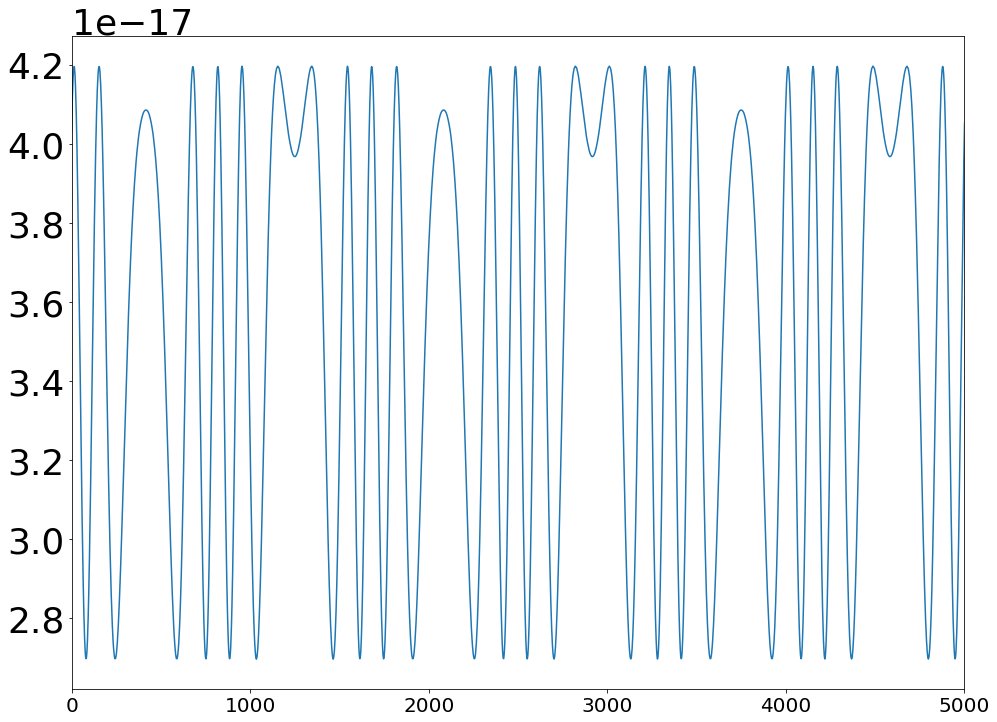

In [224]:
plt.plot(signal_theo)
plt.xlim(0,5000)

In [212]:
z_sig_10,tps_s,as_s = mock_injection_signal_from_bkg(alpha_scale_in,lambda_val=lambda_val_in,height_sep=-15.5,x_sep=13.9,offset_y=+4.9,phase_shift="TF")


Loading Gravity Data... Done!
81 9.74070978211e-06
Loaded Yukawa Force
[1.22, 0.97, 0.65, 0.49, 0.3, 0.12, 0.29, 0.13, 0.23, 0.22, 0.27, 0.27, 0.07]


In [213]:
file_creator_rounding_uniform_random_noise(z_sig_10,in_file_paths,out_dir,direction=direction_in,run_no=0,max_file=1000)    


Did not create /data/new_trap_processed/mockfiles/20200320/output/noise/digitest/. It may exist or you do not have perimissions.
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_200.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_602.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_728.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_173.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_46.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_781.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_407.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_366.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_58.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_94.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_639.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_490.h

/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_82.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_188.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_246.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_735.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_70.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_149.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_286.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_517.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_230.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_976.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_135.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_480.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_972.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise

/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_856.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_629.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_440.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_105.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_256.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_392.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_242.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_588.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_659.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_388.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_577.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_951.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_331.h5
/data/new_trap_processed/mockfiles/20200320/raw/noi

/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_831.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_273.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_956.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_410.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_217.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_747.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_487.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_261.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_848.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_418.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_788.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_35.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_539.h5
/data/new_trap_processed/mockfiles/20200320/raw/nois

/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_590.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_67.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_276.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_893.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_546.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_158.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_630.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_128.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_112.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_85.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_238.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_28.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_542.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/

/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_111.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_372.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_216.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_875.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_960.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_37.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_150.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_3.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_668.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_301.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_17.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_708.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_634.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/N

/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_362.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_197.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_72.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_254.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_698.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_43.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_538.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_582.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_387.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_975.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_130.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_923.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_609.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise

/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_73.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_494.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_251.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_572.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_512.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_131.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_591.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_500.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_208.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_143.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_434.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_859.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_685.h5
/data/new_trap_processed/mockfiles/20200320/raw/nois

/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_322.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_601.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_424.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_795.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_573.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_8.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_502.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_894.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_244.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_576.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_755.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_526.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise/NoShaking_1_843.h5
/data/new_trap_processed/mockfiles/20200320/raw/noise

In [342]:
file_avg = 51

100%|██████████| 1000/1000 [00:00<00:00, 20754.22it/s]

1000


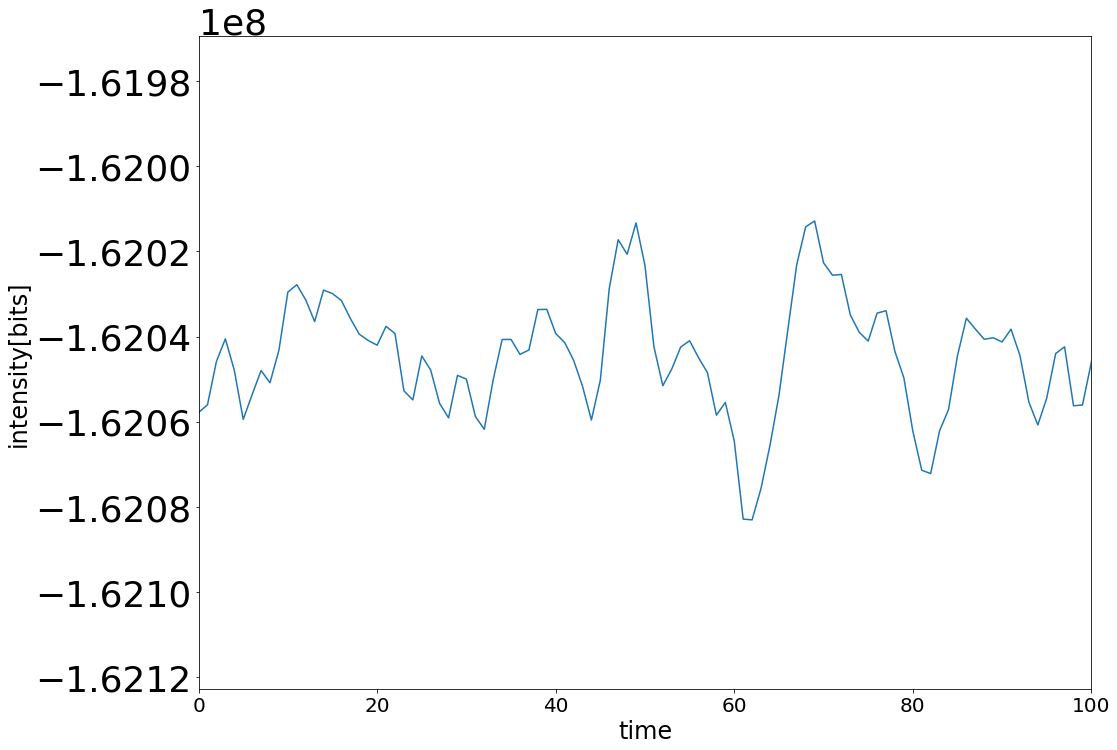

In [343]:
# step 1: load a raw file
in_file_paths = []
for file_path in glob.iglob(in_dir+"*.h5"):
    in_file_paths.append(file_path)

#in_file_paths=[in_dir+"NoShaking_1_200.h5",in_dir+"NoShaking_1_602.h5",in_dir+"NoShaking_1_173.h5"]

data_raw_sum=0    
print(len(in_file_paths))
i=0
for raw_file in tqdm(in_file_paths):
    #print(raw_file)
    i+=1
    if(i<file_avg):
        with h5py.File(raw_file, 'r') as f_raw:
            quad_data_raw = np.array(f_raw['quad_data'])
            data_raw = quad_data_raw.reshape(-1,12).T[9]
            f_raw.close()
        data_raw_sum=data_raw_sum+data_raw
plt.plot(data_raw_sum)
plt.xlim(0,100)
plt.xlabel("time")
plt.ylabel("intensity[bits]")
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 20042.26it/s]

1000


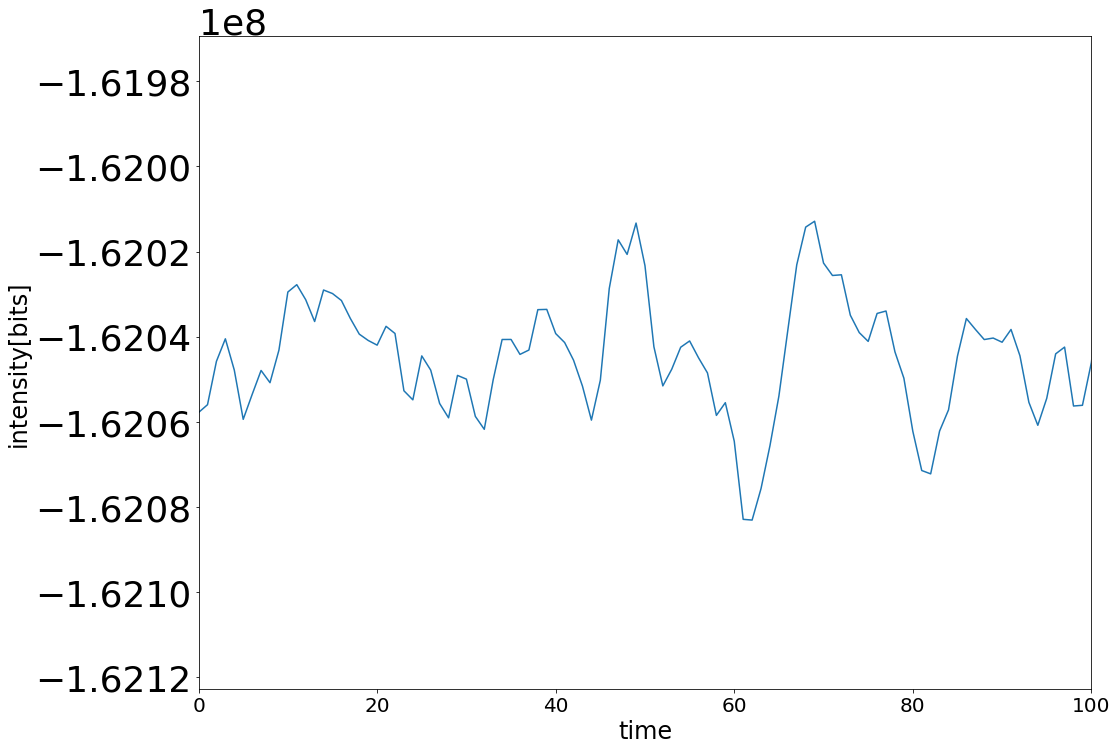

In [344]:
out_file_paths = []
for file_path in glob.iglob(out_dir+"/0/"+"*.h5"):
    out_file_paths.append(file_path)
    out_file_paths.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))    

print(len(out_file_paths))

#out_file_paths = [out_dir+"/0/Noise_batch_0.h5",out_dir+"/0/Noise_batch_3.h5",out_dir+"/0/Noise_batch_1.h5"]

data_sum=0
i=0
for test_file in tqdm(out_file_paths):
    #print(test_file)
    i+=1
    if(i<file_avg):
        with h5py.File(test_file, 'r') as f_in:
            quad_data_in = np.array(f_in['quad_data'])
            data_in = quad_data_in.reshape(-1,12).T[9]
            f_in.close()    
        data_sum=data_sum+data_in

plt.plot(data_sum)
plt.xlim(0,100)
plt.xlabel("time")
plt.ylabel("intensity[bits]")
plt.show()

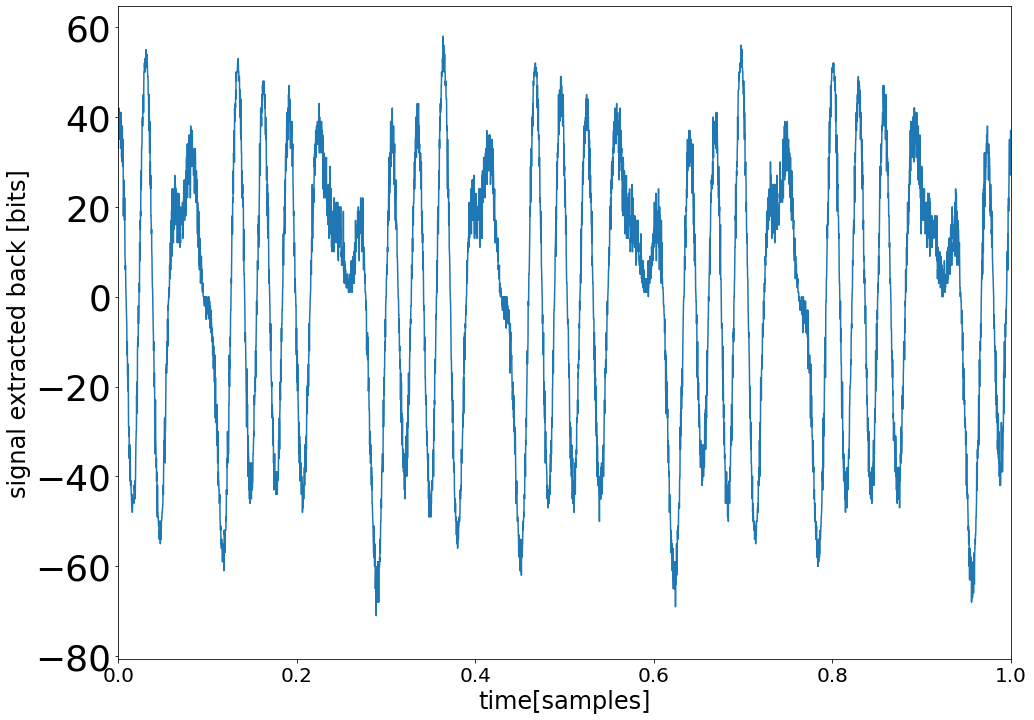

In [345]:
x=np.arange(0,10,1/5000)
plt.plot(x,data_sum-data_raw_sum)
plt.xlim(0,1)
plt.ylabel("signal extracted back [bits]")
plt.xlabel("time[samples]")
plt.show()

In [346]:
diff = data_sum-data_raw_sum
z_comp = z_sig_10*(file_avg-1)

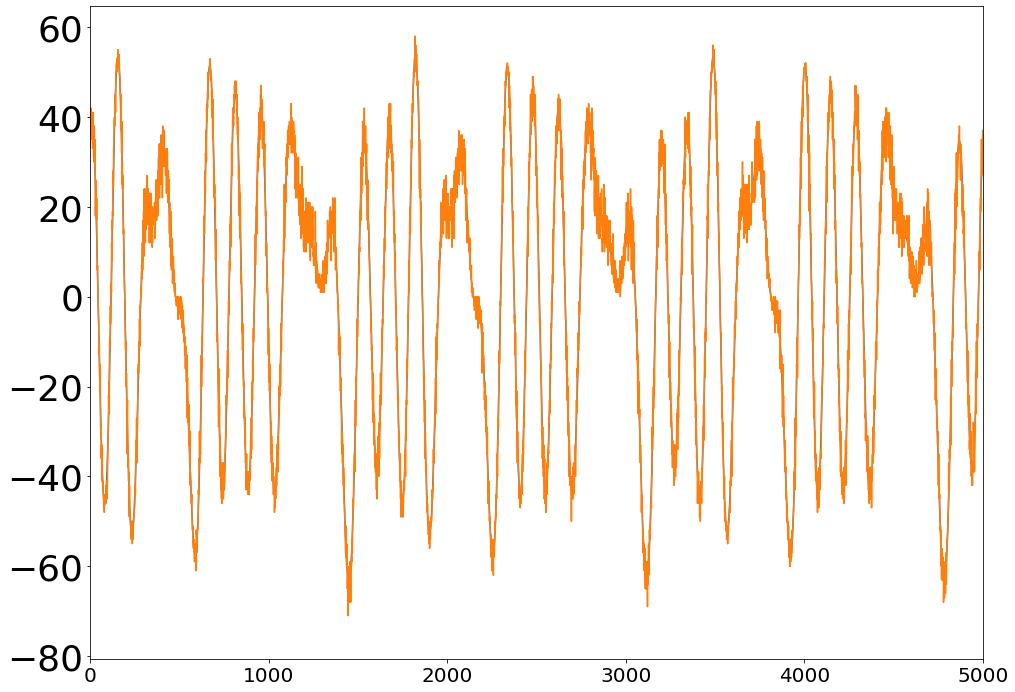

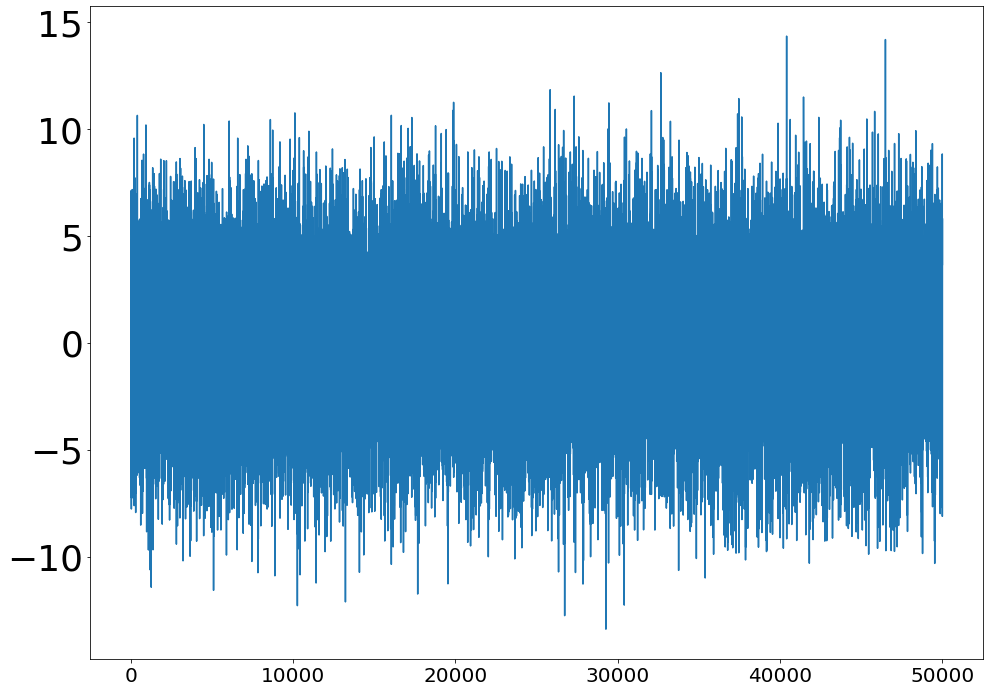

In [347]:
plt.plot(z_comp)
plt.plot(diff)
plt.xlim(0,5000)
plt.show()
plt.plot((z_comp-diff))
plt.show()

In [348]:
diff_fft=np.abs(np.fft.rfft(diff))
diff_angle =np.angle(np.fft.rfft(diff))
theo_fft = np.abs(np.fft.rfft(z_comp))
theo_angle = np.angle(np.fft.rfft(z_comp))

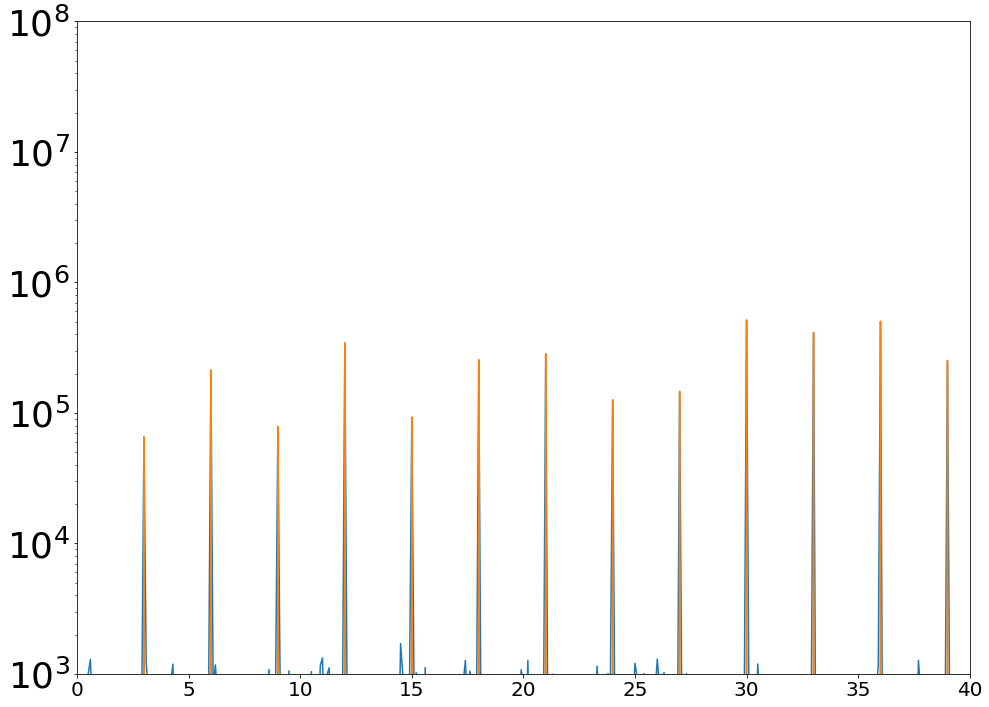

In [349]:
x=np.arange(0,2500.1,0.1)
plt.plot(x,diff_fft)
plt.plot(x,theo_fft)
plt.yscale("log")
plt.xlim(0,40)
plt.ylim(10e2,10e7)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (25001,) and (13,)

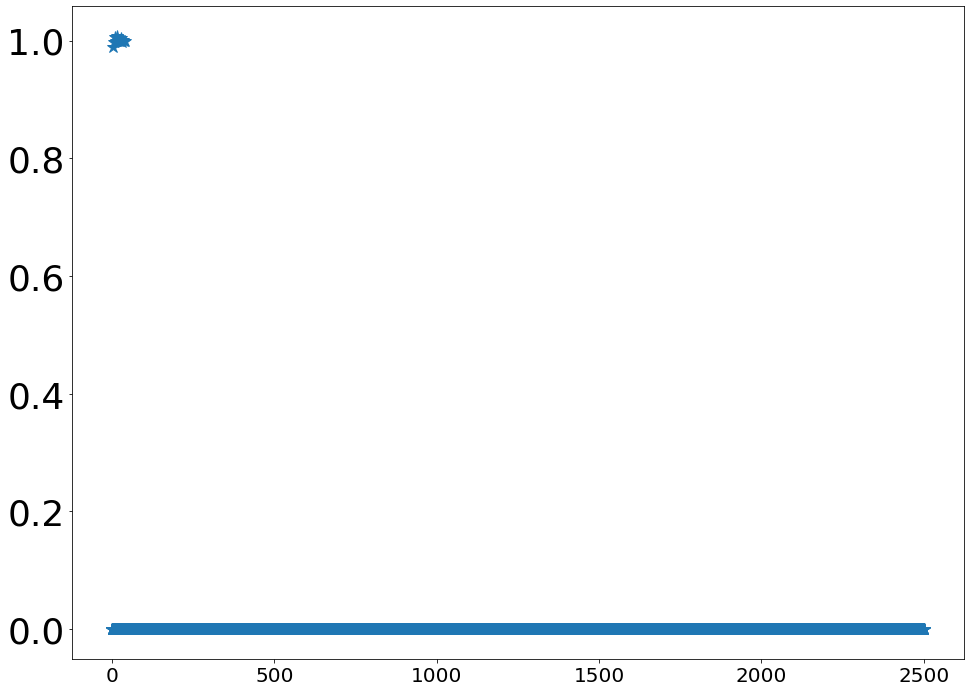

In [350]:
#ratio50=theo_fft/diff_fft
#ratio1=theo_fft/diff_fft
#plt.plot(x,theo_fft/diff_fft,linestyle="",marker="*",markersize=12,label="1000 files")
plt.plot(x,ratio50,linestyle="",marker="*",markersize=12,label="50 files")
plt.plot(x,ratio1,linestyle="",marker="*",markersize=12,label="1 file")
plt.xlim(0,40)
plt.ylim(0.90,1.1)
plt.ylabel("amplitude spectrum ratio")
plt.xlabel("frequency [Hz]")
plt.axhline(1)
plt.legend()
plt.show()

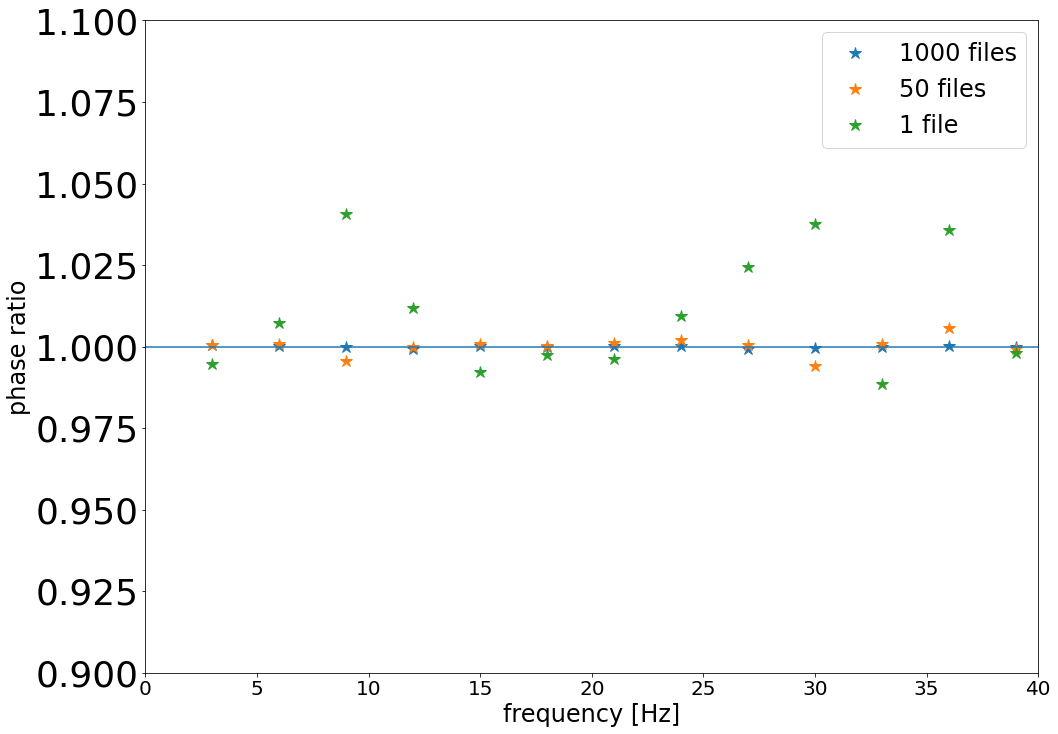

In [354]:
harms=np.arange(3,42,3)
#ratio50=[theo_angle[xa]/diff_angle[xa] for xa in np.arange(30,420,30)]
#ratio1=[theo_angle[xa]/diff_angle[xa] for xa in np.arange(30,420,30)]
#ratio1000=[theo_angle[xa]/diff_angle[xa] for xa in np.arange(30,420,30)]
plt.plot(harms,ratio1000,linestyle="",marker="*",markersize=12,label="1000 files")
plt.plot(harms,ratio50,linestyle="",marker="*",markersize=12,label="50 files")
plt.plot(harms,ratio1,linestyle="",marker="*",markersize=12,label="1 file")
plt.xlim(0,40)
plt.ylim(0.90,1.1)
#plt.axvline(3)
plt.ylabel("phase ratio")
plt.xlabel("frequency [Hz]")
plt.axhline(1)
#plt.axhline(1)
plt.legend()
plt.show()

In [308]:
theo_angle

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])